In [1]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='wattawsdb01.cztrsaytzops.us-east-1.rds.amazonaws.com',
                                         database='watt_db',
                                         user='linnea',
                                         password='XandB00bs')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
#finally:
#    if (connection.is_connected()):
#        cursor.close()
#        connection.close()
#        print("MySQL connection is closed")

Connected to MySQL Server version  5.7.19-log
You're connected to database:  ('watt_db',)


In [17]:
sql_select_Query = "select flDate, skedDep, actDep, flD from bts_data where flDate between '2019-11-20' and '2019-11-30' and flO='JFK'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in airports is :", cursor.rowcount)
#print(records)

Total number of rows in airports is : 3607


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(records)
df.columns = ['flDate', 'skedDep', 'actDep', 'flD']
#groupby_fld = df.groupby('flD')
#for fld, value in groupby_fld['skedDep']:
#   print(fld, value.count())
#print(df[1:2].diff(axis=1))
#plt.hist()

-433 1
-255 1
-254 1
-241 2
-234 1
-207 1
-194 1
-192 1
-181 1
-180 1
-169 2
-168 1
-165 1
-164 1
-158 2
-157 1
-152 2
-151 1
-150 1
-144 2
-140 2
-138 1
-135 1
-124 1
-119 1
-117 1
-116 1
-115 2
-114 3
-111 1
-110 1
-109 1
-106 1
-105 3
-104 1
-101 2
-98 1
-96 2
-95 2
-94 3
-89 3
-88 2
-87 2
-86 1
-85 2
-81 1
-80 2
-79 3
-78 2
-77 2
-76 1
-75 4
-74 5
-73 1
-72 1
-71 1
-70 1
-68 2
-67 2
-66 1
-65 3
-64 2
-63 3
-60 2
-59 4
-58 2
-57 2
-56 3
-55 1
-54 5
-53 1
-52 2
-51 3
-50 4
-48 1
-47 3
-46 4
-45 2
-44 4
-43 4
-42 3
-41 3
-40 2
-39 1
-38 8
-37 5
-36 4
-35 5
-34 3
-33 6
-32 3
-31 8
-30 9
-29 8
-28 4
-27 3
-26 11
-25 5
-24 7
-23 5
-22 10
-21 9
-20 10
-19 9
-18 13
-17 15
-16 12
-15 14
-14 12
-13 16
-12 14
-11 10
-10 26
-9 23
-8 21
-7 24
-6 25
-5 20
-4 44
-3 33
-2 43
-1 54
0 173
1 199
2 229
3 276
4 337
5 386
6 289
7 319
8 212
9 188
10 133
11 71
12 33
13 22
14 7
15 5
16 4
17 1
18 2
1193 1
1251 1
1273 1
1283 1
1307 1
1309 1
1354 1
1376 1
1385 1
1416 1
1438 1


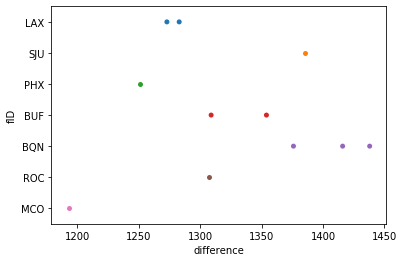

In [19]:
df_time = pd.DataFrame(df['skedDep'] - df['actDep'])
df_time.columns = ['difference']
#print(df_time)
#print(df_time.loc[df_time['difference'] > 0])
#hist = df_time.loc[df_time['difference'] > 30].hist(bins=100)
df['difference'] = df_time
#print(df)
groupby_diff = df.groupby('difference')
for diff, value in groupby_diff['difference']:
    print(diff, value.count())
sns.stripplot(x='difference', y='flD', data=df.loc[df['difference']>30], jitter=False, size=5)